<h1><center> F for Flash? A Dive into League's oldest Question.</center></h1>

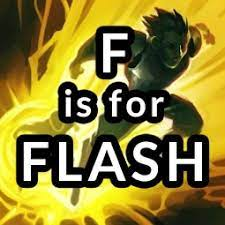


## Introduction.

**Question at hand**  ➔ Does having flash on F, instead of D, affect the upper tiers of competitive league of legends?

League of Legends is a competitive, often infuriating, a multiplayer game available to many different regions around the world. There are two teams of five people in five roles. Players can choose a wide variety of characters to play all of which have their respective unique abilities. However, there are ten universal abilities, called Summoner Spells, that all characters have access to on top of what they already offer.

Flash is the most common Summoner Spell due to its utility in the game and is often placed on D or F on the keyboard. In this analysis, we will try to find the effect of this important ability's keybinding on success in the upper tiers of Soloq. 

Soloq or Solo Queue is the competitive ladder system built into League of Legends. It is how players are scouted by professional teams for their talent and how friends are clowned for their lack thereof. The ladder is made up of divisions where players climb up with consistent wins. At the top of it, all is the Challenger Division where professional players and upcoming talent often reside. To note, players can only play with one pre-made partner in these ranked (games that affect division) games so the ladder system aims to evaluate individual prowess at the game.

The statistic we will be analyzing in this study is the difference in the proportion of players in the Challenger Division that use flash on F from the proportion of players in Master Division that use flash on F. Allowing us to compare the differences between these values. 

### Dataset.

In [145]:
library(tidyverse)
library(repr)
library(dplyr)
library(infer)

library(tidyr)
library(knitr)

library(gridExtra)
library(grid)


library(broom)
library(digest)



cDataBR <- read.csv('data/spell_infoBR.csv')
cDataEUW <- read.csv('data/spell_infoEUW.csv') 
cDataKR <- read.csv('data/spell_infoKR.csv') 
cDataNA <- read.csv('data/spell_infoNA.csv') 
cDataEUNE <- read.csv('data/spell_infoEUNE.csv')

mDataBR <- read.csv('data/master_spell_infoBR.csv')
mDataEUW <- read.csv('data/master_spell_infoEUW.csv')
mDataKR <- read.csv('data/master_spell_infoKR.csv')
mDataNA <- read.csv('data/master_spell_infoNA.csv')
mDataEUNE <- read.csv('data/master_spell_infoEUNE.csv')


head(cDataBR)
head(mDataBR)

,d_spell,f_spell,result
,<chr>,<chr>,<chr>
1,Ignite,Flash,True
2,Flash,Smite,True
3,Flash,Teleport,False
4,Flash,Smite,False
5,Flash,Heal,True
6,Flash,Ignite,False


,d_spell,f_spell,result
,<chr>,<chr>,<chr>
1,Flash,Ignite,False
2,Flash,Heal,True
3,Smite,Flash,True
4,Smite,Flash,True
5,Flash,Ignite,False
6,Heal,Flash,True


###### Wrangling.
I obtained my data with a python program that accesses the Riot Games API. Here is the github link to my project for those interested: I obtained my data with a python program that accesses the Riot Games API. Here is the github link to my project https://github.com/aasuter/FforFlash

##### Description.

The data sets include Challenger and Master Division players in the regions: North America, Europe West, Korea, Brazil, and Europe North East. Because of this, we have 10 different data sets with two data sets corresponding to each region. 

I included what Summoner Spells are assigned to the D and F keys and if they won the game they were playing in. This corresponds to the columns d_spell, f_spell, and result.

To create these data sets I only drew in one game from each of these players' match history to find their relevant key bindings. I did this because it is not necessary to draw anymore as players do not change their settings very often, especially keybindings.

##### Cleaning.

To clean our data, we must look back at the question at hand, that is: how does having flash on F influence the upper tiers of competitive league of legends? To analyze this question we will be conduction analysis of the proportion of players with flash on F in both the Challenger and Master divisions. 

(1) Beginning our cleaning we will first remove the results column for now, as well as the d_spell. We are removing the d_spell column as you can not have two instances of flash, that is you can not have flash on F and D. Therefore, having flash under the f_spell column, or not having flash, will still give us the relevant data. 

(2) We also clean the data by removing data points where the individual did not take flash that game, as this is not relevant to our question.

(3) Now, we will be mutating our data to add a column assigning the division of each data point so we can conduct our analysis later in the article, and we will be assigning false to values that are not flash, and true for values that are flash in the f_spell column.

(4) Lastly, we will combine the two data frames for each region. And we will create one large data frame containing all regions.


In [134]:
### Cleaning Begins

# Challenger Data Sets
chalDataBR <- cDataBR %>%
    select(-result) %>% # (1)
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% # (2) we filter before removing d_spell so we remove all instances of no flash
    select(-d_spell) %>% # (1)
    mutate(division = 'Challenger', f_spell = (f_spell == 'Flash')) # (3)

chalDataEUW <- cDataEUW %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Challenger', f_spell = (f_spell == 'Flash'))

chalDataKR <- cDataKR %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Challenger', f_spell = (f_spell == 'Flash'))

chalDataNA <- cDataNA %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Challenger', f_spell = (f_spell == 'Flash'))

chalDataEUNE <- cDataEUNE %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Challenger', f_spell = (f_spell == 'Flash'))

# Master Data Sets
mastDataBR <- mDataBR %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Master', f_spell = (f_spell == 'Flash'))

mastDataEUW <- mDataEUW %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Master', f_spell = (f_spell == 'Flash'))

mastDataKR <- mDataKR %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Master', f_spell = (f_spell == 'Flash'))

mastDataNA <- mDataNA %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Master', f_spell = (f_spell == 'Flash'))

mastDataEUNE <- mDataEUNE %>%
    select(-result) %>%
    filter(d_spell == 'Flash' | f_spell == 'Flash') %>% 
    select(-d_spell) %>%
    mutate(division = 'Master', f_spell = (f_spell == 'Flash'))

# (4) Combining our Data frames
brData <- rbind(chalDataBR, mastDataBR)
euwData <- rbind(chalDataEUW, mastDataEUW)
krData <- rbind(chalDataKR, mastDataKR)
naData <- rbind(chalDataNA, mastDataNA)
euneData <- rbind(chalDataEUNE, mastDataEUNE)

globalData <- rbind(chalDataBR, mastDataBR, chalDataEUW, mastDataEUW, chalDataKR, mastDataKR, chalDataNA, mastDataNA,
                   chalDataEUNE, mastDataEUNE, mastDataKR)

# Adding global master and challenger data frame used later in hypothesis tests
mastDataGloabl<- rbind(mastDataBR, mastDataEUW, mastDataKR, mastDataNA, mastDataEUNE)
chalDataGloabl<- rbind(chalDataBR, chalDataEUW, chalDataKR, chalDataNA, chalDataEUNE)

# visualize these new data frames
head(chalDataBR)

,f_spell,division
,<lgl>,<chr>
1,TRUE,Challenger
2,FALSE,Challenger
3,FALSE,Challenger
4,FALSE,Challenger
5,FALSE,Challenger
6,FALSE,Challenger


##### Cleaning Conclusion.
Now, are data sets have two columns. 
* (1) Our explanatory variable being **division** which is a string value assigning the division of the data entry. 

* (2) Our response variable **f_spell** has transformed into a boolean value indicating if the summoner used flash on F.

## Preliminary Results.

In [135]:
# Calculating our Observed Difference in Proportion, also adding region column o help us visualize our results
br_obs_diff_prop <- brData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "Brazil")
    
euw_obs_diff_prop <- euwData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "Europe West")

kr_obs_diff_prop <- krData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "Korea")

na_obs_diff_prop <- naData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "North America")

eune_obs_diff_prop <- euneData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "Europe North East")

global_obs_diff_prop <- globalData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master")) %>%
                    mutate(region = "Global")

regions_obs_diff_prop <- rbind(br_obs_diff_prop, euw_obs_diff_prop, kr_obs_diff_prop, na_obs_diff_prop, eune_obs_diff_prop, 
                              global_obs_diff_prop)

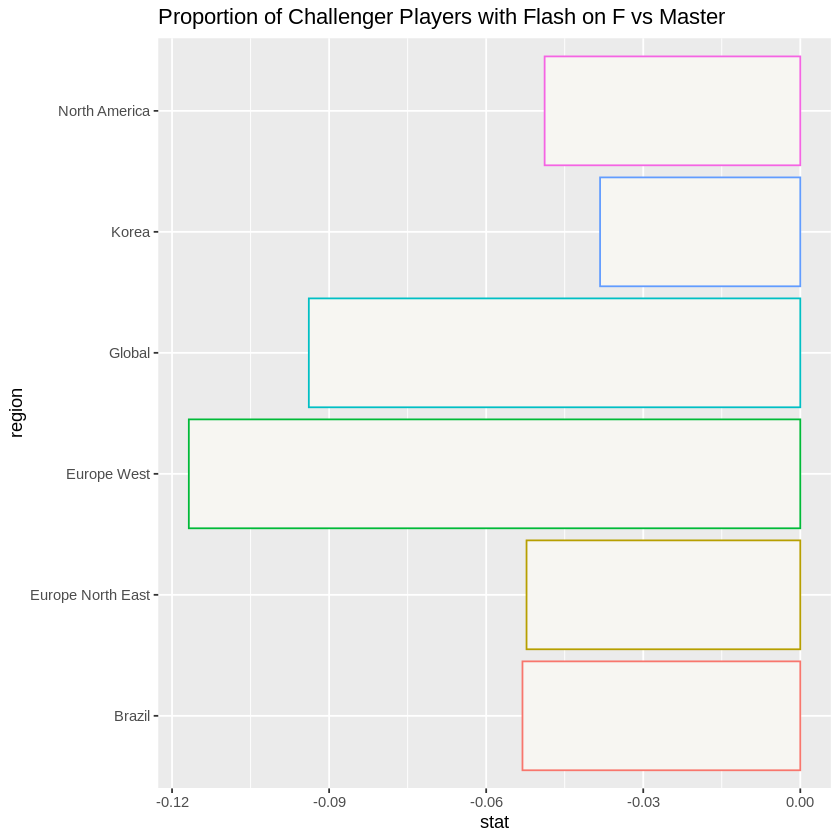

In [136]:
# Visualizing the Difference in proportion
regionsVisual <- regions_obs_diff_prop %>%
    ggplot(aes(x=region, y=stat, color = region)) +
    geom_bar(stat="identity", fill="#f7f6f2") +
    labs(title= 'Proportion of Challenger Players with Flash on F vs Master') +
    theme(legend.position="none") + 
    coord_flip()

regionsVisual

## Methods.

Good things about this report
* The data coming from the Riot Games API is up to date and very relevant
* We can gain access to the population parameter by calculating the difference in proportion from available information online right away.
* Lastly, the sample of Challenger players in each division is a comprehensive list of data. Therefore, this will improve our estimate as we will only be taking subsets of our general population.

Since we will be taking a subset of our Master Division population we will need to provide accurate confidence intervals for our difference in proportion and test our hypothesis. That is, the value is greater than zero (as we have indicated, we are subtracting our Challenger proportion from General Proportion).

We will be using asymptotic and computer-generated hypothesis tests to better understand our claim of 'F is for flash', and use confidence intervals generated with bootstrapping (standard error method due to having normally shaped distributions) to further extend this analysis

### Hypothesis Test.

For this project, our initial hypothesis is that there will be a higher proportion of flash being used in the Challenger division than Master division. So to better answer our question we will be performing a hypothesis test with our data. 

Therefore, our **null hypothesis** will be that our proportion of flash in Challenger and Master divisions are equal and our **alternative hypothesis** will be that the proportion o flash used in Challenger is greater than that of Master division. 

<br>

$H_0$: challenger and master division players have the same proportion of flash on F <br>
$H_A$: challenger division players have a higher proportion of flash on F than Master division players

<br>

And in Mathematical Notation (where $p_c$ is proportion of challenger players with flash on f and $p_m$ is proportion of master players with flash on f)

$H_0$: $p_c - p_m = 0$ <br>
$H_A$: $p_c - p_m > 0$

##### Hypothesize The Null.

We start by generating our null distributions for our regions. For this analysis, we will be using a significance level of 0.05. 

Since we are counting the values of flash being F for our proportion, we indicate success= 'True' in our specific function. Also in our hypothesize function, we chose null= 'independence' as we are testing whether our response variable 'division' is independent of our explanatory variable 'f_spell'. 

Indicating 'permute' in generating means we will be sampling without replacement using shuffling, which is common for Hypothesis testing. We choose 1000 shuffles for our testing.

Also, note we will be generating shuffling samples of just the Master division data frames. We do this because our Master tier data frames are subsets of the overall Master tier population, and our Challenger division data frames are an exhaustive list of players within the Challenger division.

In [137]:
set.seed(1337)

### Our Null Distributions
br_null_distribution <- brData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

euw_null_distribution <- euwData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

kr_null_distribution <- krData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

na_null_distribution <- naData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

eune_null_distribution <- euneData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

global_null_distribution <- globalData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    hypothesize(null="independence") %>%
                    generate(reps = 1000, type = "permute") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

# Our Observed difference in proportions
rbind(br_obs_diff_prop, euw_obs_diff_prop, kr_obs_diff_prop, na_obs_diff_prop, eune_obs_diff_prop, global_obs_diff_prop)


stat,region
<dbl>,<chr>
-0.05306689,Brazil
-0.11679758,Europe West
-0.03824278,Korea
-0.04883495,North America
-0.05229120,Europe North East
-0.09387583,Global


###### Visualize the p-value

Now we will see how our observed difference above stacks up to our hypothesized distributions. We start by visualizing our null distributions for each region $\hat p_c - \hat p_m$ using visualize.

Then we will add the real-life data we collected to the plot and shade the values indicating our alternative hypothesis (p_values). This will be done by indicating direction= 'right' in our shade_p_values function indicating what we expected that $p_c - p_m > 0$ (proportion in challenger division to be greater than that in master division).

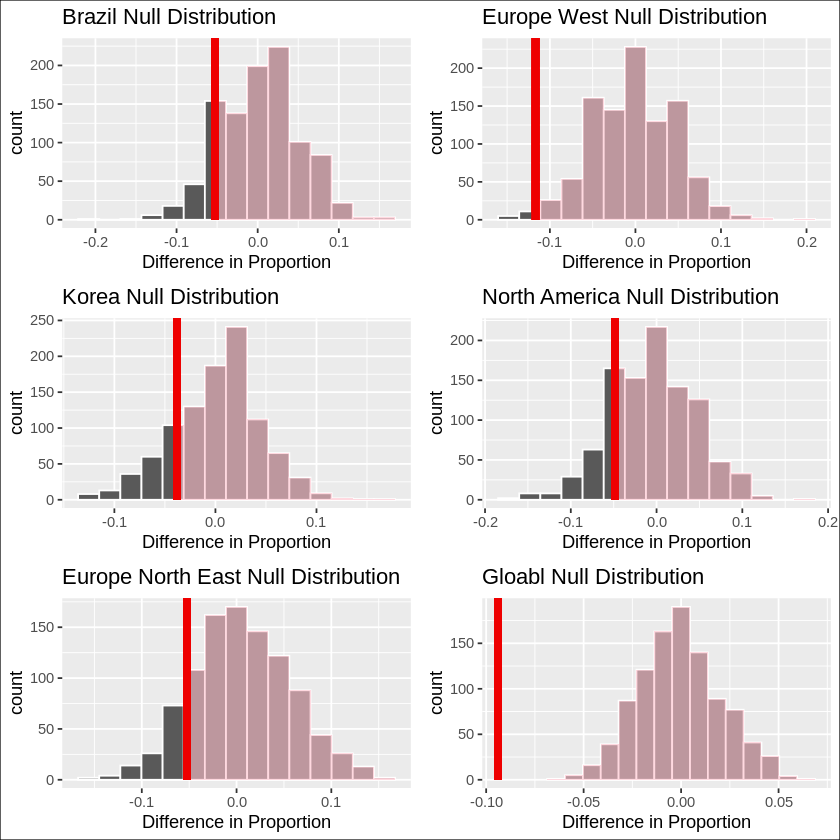

In [138]:
set.seed(1337)

### Simulation Based Null Distribution
br_null_visual <- br_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = br_obs_diff_prop[,1], direction='right') +
                    labs(title = 'Brazil Null Distribution', x = 'Difference in Proportion')

euw_null_visual <- euw_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = euw_obs_diff_prop[,1], direction='right') +
                    labs(title = 'Europe West Null Distribution', x = 'Difference in Proportion')

kr_null_visual <- kr_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = kr_obs_diff_prop[,1], direction='right') +
                    labs(title = 'Korea Null Distribution', x = 'Difference in Proportion')

na_null_visual <- na_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = na_obs_diff_prop[,1], direction='right') +
                    labs(title = 'North America Null Distribution', x = 'Difference in Proportion')

eune_null_visual <- eune_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = eune_obs_diff_prop[,1], direction='right') +
                    labs(title = 'Europe North East Null Distribution', x = 'Difference in Proportion')

global_null_visual <- global_null_distribution %>% 
                    visualize() +
                    shade_p_value(obs_stat = global_obs_diff_prop[,1], direction='right') +
                    labs(title = 'Gloabl Null Distribution', x = 'Difference in Proportion')

grid.arrange(br_null_visual, euw_null_visual, kr_null_visual, na_null_visual, eune_null_visual, global_null_visual, ncol=2)
grid.rect(gp=gpar(fill=NA))

###### p-value.

Observing our graphs above, it seems our p-value will be quite large for all of our regions. Regarding the p-value, we are observing the probability of obtaining our test statistic just as extreme or even more extreme than our observed test statistic assuming our null hypothesis is true. So it seems we would often observe differences in proportions similar or greater than our initial observed difference in proportion in this hypothesized universe of no difference ($p_c - p_m = 0$)

Now, let's calculate these values so we can get and compare them to our significance level.

In [139]:
set.seed(1337)

# Get p-values
br_p_value <- br_null_distribution %>%
                get_p_value(obs_stat = br_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'Brazil')

euw_p_value <- euw_null_distribution %>%
                get_p_value(obs_stat = euw_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'Europe West')

kr_p_value <- kr_null_distribution %>%
                get_p_value(obs_stat = kr_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'Korea')

na_p_value <- na_null_distribution %>%
                get_p_value(obs_stat = na_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'North America')

eune_p_value <- eune_null_distribution %>%
                get_p_value(obs_stat = eune_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'Europe North East')

global_p_value <- global_null_distribution %>%
                get_p_value(obs_stat = global_obs_diff_prop[,1], direction ='right') %>%
                mutate(region = 'Global')

rbind(br_p_value, euw_p_value, kr_p_value, na_p_value, eune_p_value, global_p_value)

p_value,region
<dbl>,<chr>
0.891,Brazil
0.989,Europe West
0.839,Korea
0.859,North America
0.881,Europe North East
1.000,Global


From these results we can now say that the probability of observing a difference in proportions as large as the observed test statistics due to sampling variation aline in the null distribution is:
* Brazil: 89.1%
* Europe West: 98.9%
* Korea: 83.9%
* North America: 85.9%
* Europe North West: 88.1%
* Global: 100%

 
Since the significance level we defined is 0.05, we fail to reject $H_0$ in all six cases.

From this we can not make any claims in favor of proportion of flash on F as an indicator of rank in the upper tiers.

### Camparing With Confidence Intervals.

We will be generating a 95% confidence interval for $p_c - p_m$ using bootstrapping below. We will be using the standard error method of computing the confidence intervals as our distributions are relatively normally shaped.

lower_ci,upper_ci,region
<dbl>,<dbl>,<chr>
-0.1545413,0.04840749,Brazil
-0.2128573,-0.02073781,Europe West
-0.1252069,0.04872134,Korea
-0.1460832,0.04841327,North America
-0.1540824,0.04950003,Europe North East
-0.1363941,-0.05135752,Global


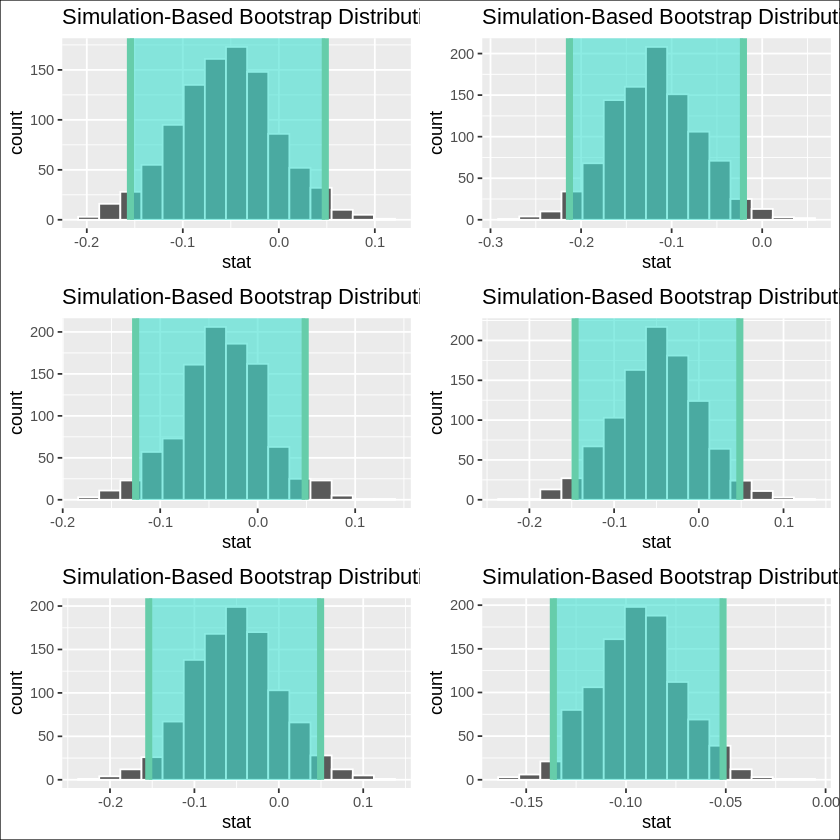

In [140]:
set.seed(1337)

### Create Our Bootstrap Distributions
br_boot_distribution <- brData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

euw_boot_distribution <- euwData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

kr_boot_distribution <- krData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

na_boot_distribution <- naData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

eune_boot_distribution <- euneData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))

global_boot_distribution <- globalData %>%
                    specify(formula= f_spell ~ division, success="TRUE") %>%
                    generate(reps = 1000, type = "bootstrap") %>%
                    calculate(stat = "diff in props", order = c("Challenger", "Master"))


### Get Confidence Intervals
br_se_ci <- br_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = br_obs_diff_prop[,1]) 

euw_se_ci <- euw_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = euw_obs_diff_prop[,1]) 

kr_se_ci <- kr_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = kr_obs_diff_prop[,1]) 
 
na_se_ci <- na_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = na_obs_diff_prop[,1]) 
eune_se_ci <- eune_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = eune_obs_diff_prop[,1]) 

global_se_ci <- global_boot_distribution %>% 
                    get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = global_obs_diff_prop[,1]) 


### Visualize Confidence Intervals
br_boot_visual <- br_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = br_se_ci)

euw_boot_visual <- euw_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = euw_se_ci)

kr_boot_visual <- kr_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = kr_se_ci)

na_boot_visual <- na_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = na_se_ci)

eune_boot_visual <- eune_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = eune_se_ci)

global_boot_visual <- global_boot_distribution %>%
                    visualize() +
                    shade_confidence_interval(endpoints = global_se_ci)

# View Visuals
grid.arrange(br_boot_visual, euw_boot_visual, kr_boot_visual, na_boot_visual, eune_boot_visual, global_boot_visual, ncol=2)
grid.rect(gp=gpar(fill=NA))

# View CIs
rbind(br_se_ci %>% mutate(region = 'Brazil'), euw_se_ci %>% mutate(region = 'Europe West'), 
      kr_se_ci %>% mutate(region = 'Korea'), na_se_ci %>% mutate(region = 'North America'), 
      eune_se_ci %>% mutate(region = 'Europe North East'), global_se_ci %>% mutate(region = 'Global'))

#####  CI Observations
From our table and graphs above, notice the distributions that do not include zero. 

Europe West and the Global distributions do not include the value of zero. This indicates that the values of $p_c$ and $p_m$ are truly different, however in contrast to our original hypothesis. That is, flash on D is more indicative of higher ranks in Europe West and the overall general population. 

**Note:** we are 95% confident that the values fall in the confidence intervals in the table above.

The other distributions not mentioned all contain zero so no claims that $p_c$ and $p_m$ can be justified.

### Hypothesis Testing using Two-sample z-test

We used computer-generated methods in approximating our Hypothesis test above, so now we will do the same, but using the Two-sample Z-test. We use this when we want to compare two proportions.

To test $H_0$ we use the following test statistic:

$Z = \frac{\hat p_c - \hat p_,}{sqrt(\hat p (1 - \hat p) (\frac{1}{n_c} + \frac {1}{n_m}))}$

where $\hat p$ is defined as the pooled proportion given by:

$\hat p = \frac{n_cp_c + n_mp_m}{n_c + n_m}$

and $n_c$ and $n_m$ are the sample sizes.

Since we are relying on the CLT, if the sample size is such that $n \hat p \geq 10$ and $n(1 - \hat p) \geq 10$, our approzimation of the null-model by standard Gaussian will work fairly well.

Now lets generate the variables needed to find our results:

In [141]:
### Check to see if the conditions above hold.

# n1 will size of challenger data frames, n2 size of master data frame
br_n1 <- nrow(chalDataBR)  
br_n2 <- nrow(mastDataBR)

euw_n1 <- nrow(chalDataEUW)  
euw_n2 <- nrow(mastDataEUW)

kr_n1 <- nrow(chalDataKR)  
kr_n2 <- nrow(mastDataKR)

na_n1 <- nrow(chalDataNA)  
na_n2 <- nrow(mastDataNA)

eune_n1 <- nrow(chalDataEUNE)  
eune_n2 <- nrow(mastDataEUNE)

global_n1 <- nrow(chalDataGloabl)  
global_n2 <- nrow(mastDataGloabl)

# pc proportion of flash in challenger, pm will be proportion in master
br_pc <- chalDataBR %>% 
            summarize(mean = mean(f_spell))

br_pm <- mastDataBR %>%
            summarize(mean = mean(f_spell))


euw_pc <- chalDataEUW %>% 
            summarize(mean = mean(f_spell))

euw_pm <- mastDataEUW %>%
            summarize(mean = mean(f_spell))
                   

kr_pc <- chalDataKR %>% 
            summarize(mean = mean(f_spell))

kr_pm <- mastDataKR %>%
            summarize(mean = mean(f_spell))
                  

na_pc <- chalDataNA %>% 
            summarize(mean = mean(f_spell))

na_pm <- mastDataNA %>%
            summarize(mean = mean(f_spell))


eune_pc <- chalDataEUNE %>% 
            summarize(mean = mean(f_spell))

eune_pm <- mastDataEUNE %>%
            summarize(mean = mean(f_spell))


global_pc <- chalDataGloabl %>% 
            summarize(mean = mean(f_spell))

global_pm <- mastDataGloabl %>%
            summarize(mean = mean(f_spell))
                      
# Verify conditions above
                  
rbind(br_n1*br_pc >= 10, br_n1*(1-br_pc) >= 10,
      br_n2*br_pm >= 10, br_n2*(1-br_pm) >= 10,
      euw_n1*euw_pc >= 10, euw_n1*(1-euw_pc) >= 10,
      euw_n2*euw_pm >= 10, euw_n2*(1-euw_pm) >= 10,
      kr_n1*kr_pc >= 10, kr_n1*(1-kr_pc) >= 10,
      kr_n2*kr_pm >= 10, kr_n2*(1-kr_pm) >= 10,
      na_n1*na_pc >= 10, na_n1*(1-na_pc) >= 10,
      na_n2*na_pm >= 10, na_n2*(1-na_pm) >= 10,
      eune_n1*eune_pm >= 10, eune_n1*(1-eune_pc) >= 10,
      eune_n2*br_pc >= 10, eune_n2*(1-eune_pm) >= 10,
      global_n1*global_pc >= 10, global_n1*(1-global_pc) >= 10,
      global_n2*global_pm >= 10, global_n2*(1-global_pm) >= 10)

mean
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


###### Condition Check.

All conditions have been met, so we will continue with our procedure. 

<br>

In [142]:
### Calculating Test Statistic for Each Region

# Generate pool proportion for each region
br_pool_prop <- (br_n1 * br_pc + br_n2 * br_pm)/(br_n1 + br_n2)
euw_pool_prop <- (euw_n1 * euw_pc + euw_n2 * euw_pm)/(euw_n1 + euw_n2)
kr_pool_prop <- (kr_n1 * kr_pc + kr_n2 * kr_pm)/(kr_n1 + kr_n2)
na_pool_prop <- (na_n1 * na_pc + na_n2 * na_pm)/(na_n1 + na_n2)
eune_pool_prop <- (eune_n1 * eune_pc + eune_n2 * eune_pm)/(eune_n1 + eune_n2)
global_pool_prop <- (global_n1 * global_pc + global_n2 * global_pm)/(global_n1 + global_n2)


# Calculate Test Stats
br_test_stat <- (br_pc - br_pm) / (sqrt(br_pool_prop*(1-br_pool_prop)*(1/br_n1 + 1/br_n2)))
euw_test_stat <- (euw_pc - euw_pm) / (sqrt(euw_pool_prop*(1-euw_pool_prop)*(1/euw_n1 + 1/euw_n2)))
kr_test_stat <- (kr_pc - kr_pm) / (sqrt(kr_pool_prop*(1-kr_pool_prop)*(1/kr_n1 + 1/kr_n2)))
na_test_stat <- (na_pc - na_pm) / (sqrt(na_pool_prop*(1-na_pool_prop)*(1/na_n1 + 1/na_n2)))
eune_test_stat <- (eune_pc - eune_pm) / (sqrt(eune_pool_prop*(1-eune_pool_prop)*(1/eune_n1 + 1/eune_n2)))
global_test_stat <- (global_pc - global_pm) / (sqrt(global_pool_prop*(1-global_pool_prop)*(1/global_n1 + 1/global_n2)))


rbind(br_test_stat, euw_test_stat, kr_test_stat, na_test_stat, eune_test_stat, global_test_stat)


### Calculate p-value
br_p_value_ztest <- 2 * pnorm(br_test_stat[1,], lower.tail = FALSE)
euw_p_value_ztest <- 2 * pnorm(euw_test_stat[1,], lower.tail = FALSE)
kr_p_value_ztest <- 2 * pnorm(kr_test_stat[1,], lower.tail = FALSE)
na_p_value_ztest <- 2 * pnorm(na_test_stat[1,], lower.tail = FALSE)
eune_p_value_ztest <- 2 * pnorm(eune_test_stat[1,], lower.tail = FALSE)
global_p_value_ztest <- 2 * pnorm(global_test_stat[1,], lower.tail = FALSE)

mean
<dbl>
-1.0567999
-2.4236813
-0.8530110
-0.9843196
-1.0107031
-2.4146201


##### Interpretting Results.

At a 0.05 significance level, like our computer-generated hypothesis testing, we fail to reject the null hypothesis. The p-values generated here are much higher than those generated above, however, both are much larger than the 0.05 significance level.

### Comparing Asymptotic and Computer Generated Hypothesis Testing.
Judging our results above I believe the bootstrapping results are more appropriate than the other. With p-values greater than one represented above, it seems unrealistic to get probability values greater than one (since the p-value should be between 0 and 1 ideally). I believe each method gave different results because our samples were very large. We were presented in class, ideally, that we should use samples with sizes between 30 and 50 to obtain the best results. With sample sizes as large as 220 this could make our asymptotic data too skewed to make proper calculations. Also, the samples were different sizes therefore this is the main contributor of these obscure values.

All in all, I believe the Bootstrapping hypothesis test is more trustworthy due to the p-values generated above for the asymptotic test. We obtained p-values between zero and one for our bootstrapping hypothesis test, however, both tests generated large values indicating that there is no way for us to reject our null hypothesis.

## Discussion.
This was a wonderful project to work on and I feel very confident in my results and methods to generate them.

##### The results.
We began this project with the idea that flash on the F key was an indicator of higher-level play. To answer this question, we gathered the Challenger and Master division data frames to observe the differences between the two. Despite Master tier being a high tier in itself, the level of play on the League of Legends solo queue ladder is exponential. That is there will be clear differences in play between the two.

We first began by testing our hypothesis using computer-generated resampling. Our Hypothesis test was based on a 0.05 significance level and we obtained p-values all greater than 0.05. To be specific, our p-values were:

In [143]:
rbind(br_p_value %>% mutate(difference = p_value - 0.05), euw_p_value %>% mutate(difference = p_value - 0.05),
      kr_p_value %>% mutate(difference = p_value - 0.05), na_p_value %>% mutate(difference = p_value - 0.05),
      eune_p_value %>% mutate(difference = p_value - 0.05), global_p_value %>% mutate(difference = p_value - 0.05))

p_value,region,difference
<dbl>,<chr>,<dbl>
0.891,Brazil,0.841
0.989,Europe West,0.939
0.839,Korea,0.789
0.859,North America,0.809
0.881,Europe North East,0.831
1.000,Global,0.950


greater than our significance level.

Because of this, we therefore fail to reject our **null hypothesis** $p_c - p_m = 0$.

Our Asymptotic results also came with very similar results, that is very high p-values much larger than our significance level. However, we are deciding to trust our computer-generated hypothesis test more due to the fact our asymptotic p-values are not proper probability values (not between 0 and 1). This is probability due to the differing sample sizing and the general large samples sizes.

<br>

Moving on to the **confidence intervals** generated with bootstrapping, we got these intervals for each region:

In [144]:
rbind(br_se_ci %>% mutate(region = 'Brazil'), euw_se_ci %>% mutate(region = 'Europe West'), 
      kr_se_ci %>% mutate(region = 'Korea'), na_se_ci %>% mutate(region = 'North America'), 
      eune_se_ci %>% mutate(region = 'Europe North East'), global_se_ci %>% mutate(region = 'Global'))

lower_ci,upper_ci,region
<dbl>,<dbl>,<chr>
-0.1545413,0.04840749,Brazil
-0.2128573,-0.02073781,Europe West
-0.1252069,0.04872134,Korea
-0.1460832,0.04841327,North America
-0.1540824,0.04950003,Europe North East
-0.1363941,-0.05135752,Global


Zero is not included in two of these intervals, that being our global data set and our Europe West data set. With this in mind, it almost suggests the opposite of our hypothesis test, that is flash on D is a better indicator of individual skill (in no way am I claiming this, just noting the strictly negative values). However, all of these results do not support the argument we were trying to make in our hypothesis testing, for **ALL** data sets.

Despite our hypothesis, I assumed we wouldn't be able to reasonably deny our null hypothesis. Flash on the F key is a default value thus I believed there was no indication this predicts better performance. However, in the league of legends community, it is very common to say 'F is for Flash,' so I wanted to investigate the age-old claim.

As far as future questions or changes I would like to consider with this project, I would like to generate random samples of lower division players and compare this with challenger players. Unfortunately, it was very hard for me to figure out a method to generate samples of players in these lower divisions. The only way I could do this would be if I added my account (self burn) and my friends' list (double burn).

##### To conclude.

F might not be for Flash.

## References

* https://lol.garena.com/news/articles/622 
     data for general proportions of d and f across the world and in specific regions
* https://aath0.github.io/journal/atp-tennis-analysis-2006-2015-do-lefties-have-an-advantage.html 
    Analysis of left and Right handed Tennis players using difference in proportion. I plan to use this as a guide to best estimate my population parameter
* https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.04%3A_Comparison_of_Two_Population_Proportions
    Further readings on Camparision of Two population propotions. I plan to use this and the given course text and notes to best calculate and analyze my estimates.
    